## Financial Data Manipulation & Analysing 84 stocks datasets using Pandas to identify the stock that experienced the largest single-day High-Low price difference.

- What is the name of the company?
- On what date did this occur?
- What was the percentage difference of this daily High-Low fluctuation?

In [1]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pkg_resources
import subprocess, sys

/tmp/ipykernel_3270/2412030402.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
def install(package):
    subprocess.run([sys.executable, "-m", "pip", "install", '--user', package])
installed_pkgs = '; '.join([str(p) for p in pkg_resources.working_set])
needed_pkgs = [
    "yfinance", 
    # "lxml"
]
for pkg in needed_pkgs:
    if pkg not in installed_pkgs:
        install(pkg)

## <span style="color:red"> Restart the kernel after package installs </span>

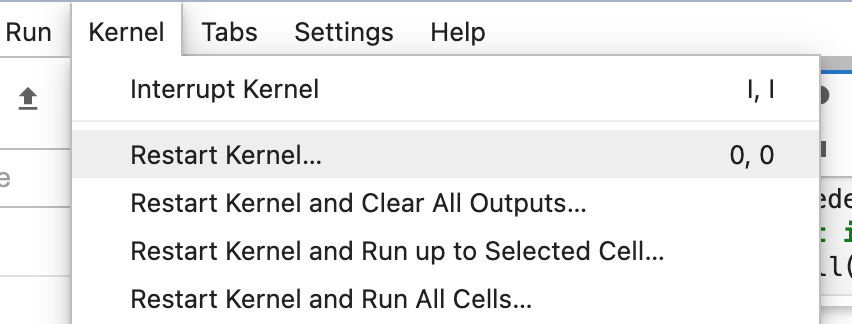

In [3]:
# Let's see which python version is used in this environment
sp = subprocess.run([sys.executable, '--version'], capture_output=True)
print(sys.executable)
print(sp.stdout.strip().decode("utf-8"))

/opt/conda/bin/python
Python 3.11.9


In [4]:
# Now we can import yfinance (you may need to restart the kernel)
import yfinance as yf
import pandas as pd
from pathlib import Path

In [5]:
# Let's define some useful constants
START = "2000-07-03"
END   = "2025-09-05" #updated the END to get the latest data

TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMD', 'ANSS', 'APH', 'AVIFY', 'BA', 'BCE',  
           'CDNS', 'CGNX', 'CHKP', 'CSCO', 'CSGP', 'CTSH', 'DASTY', 
           'DTEGY', 'ERIC', 'FDS', 'FICO', 'GD', 'GE', 'GIB', 'GLW', 'HEI', 'HPQ', 'IBM', 'IFNNY', 
           'INFY', 'INTC', 'INTU', 'JKHY', 'KKPNY', 'KLAC', 'KYOCY', 'LHX', 'LMT', 'LOGI', 'LRCX', 'MCHP', 
           'MRVL', 'MSFT', 'MSI', 'MU', 'NICE', 'NOC', 'NOK', 'NTTYY', 'NVDA', 'ORAN', 'ORCL', 'OTEX', 
           'PAYX', 'PTC', 'QCOM', 'RCI', 'ROP', 'SAP', 'SCMWY', 'SFTBF', 'SKM', 'SNPS', 'STM', 'SWKS', 'T', 
           'TDY', 'TEF', 'TER', 'TLK', 'TRMB', 'TSM', 'TTDKY', 'TU', 'TXN', 'TYL', 'VIV', 'VOD', 
           'VRSN', 'VZ', 'WDC', 'ZBRA']

DATAFILE_NAME2= "data.pickle"

# https://www.devdungeon.com/content/colorize-terminal-output-python
BOLD  = '\033[1m'
ULINE = '\033[4m'
BLUE  = '\033[34m'
RED   = '\033[31m'
RESET = '\033[0m'

In [6]:
# How many?
display(len(TICKERS))

84

## You need to consult `pandas` documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html to complete this assignment

In [7]:
#loads the old data, downloading only the new data from Yahoo Finance and combining them.
#Renamed the file variable from DATAFILE_NAME to DATAFILE_NAME2 to include new data

if Path(DATAFILE_NAME2).is_file():
    old_data = pd.read_pickle(DATAFILE_NAME2)
    new_data = yf.download(
        tickers=TICKERS,
        start=old_data.index.max().strftime("%Y-%m-%d"),
        end=END,
        group_by='ticker',
        auto_adjust=True
    )
    data = pd.concat([old_data, new_data[~new_data.index.isin(old_data.index)]])
else:
    data = yf.download(
        tickers=TICKERS,
        start=START,
        end=END,
        group_by='ticker',
        auto_adjust=True
    )

data.to_pickle(DATAFILE_NAME2)
print("Latest date in data:", data.index.max())


[*********************100%***********************]  84 of 84 completed

84 Failed downloads:
['TER', 'SWKS', 'WDC', 'AVIFY', 'ANSS', 'KYOCY', 'HEI', 'CTSH', 'LHX', 'SNPS', 'AKAM', 'ADI', 'MSI', 'ROP', 'TRMB', 'AMD', 'ZBRA', 'TEF', 'TXN', 'ERIC', 'CSCO', 'GLW', 'CSGP', 'FDS', 'GD', 'KLAC', 'NOC', 'CHKP', 'NVDA', 'LRCX', 'CGNX', 'SFTBF', 'FICO', 'NICE', 'MSFT', 'SAP', 'IFNNY', 'AAPL', 'VOD', 'MU', 'GIB', 'APH', 'ORCL', 'SKM', 'TLK', 'MRVL', 'LOGI', 'STM', 'ADSK', 'JKHY', 'BCE', 'VIV', 'BA', 'VRSN', 'INTU', 'DASTY', 'TTDKY', 'TYL', 'KKPNY', 'PTC', 'NOK', 'TU', 'PAYX', 'GE', 'INFY', 'NTTYY', 'RCI', 'T', 'SCMWY', 'QCOM', 'HPQ', 'INTC', 'ADP', 'TDY', 'TSM', 'DTEGY', 'MCHP', 'ADBE', 'LMT', 'IBM', 'OTEX', 'CDNS', 'VZ']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-09-05 -> 2025-09-05)')
['ORAN']: YFTzMissingError('possibly delisted; no timezone found')


Latest date in data: 2025-09-05 00:00:00


## How can you see your data in pandas?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6332 entries, 2000-07-03 to 2025-09-05
Columns: 510 entries, ('CSCO', 'Open') to ('GE', 'Adj Close')
dtypes: float64(510)
memory usage: 24.7 MB


In [9]:
# You may skip display() if you wish but it's more clear to have it.
data.head()

Ticker           CSCO                                                    GIB  \
Price            Open       High        Low      Close      Volume      Open   
Date                                                                           
2000-07-03  41.475241  42.456903  41.311630  42.293293  14879800.0  8.092592   
2000-07-05  41.761561  42.375100  40.207262  40.493580  27383000.0  7.968091   
2000-07-06  40.739006  42.456916  39.839148  42.375111  34561900.0  7.283333   
2000-07-07  42.293299  43.152254  41.638857  42.784130  30196900.0  6.972079   
2000-07-10  42.047889  42.947746  41.229836  41.311642  29138500.0  7.158831   

Ticker                                             ...        VZ      CGNX  \
Price           High       Low     Close   Volume  ... Adj Close Adj Close   
Date                                               ...                       
2000-07-03  8.341595  7.968091  8.092592   7000.0  ...       NaN       NaN   
2000-07-05  7.968091  7.158831  7.283333  19400.0  ...       NaN       NaN   
2000-07-06  7.283333  6.972079  6.972079   6000.0  ...       NaN       NaN   
2000-07-07  7.096581  6.785327  7.096581  40700.0  ...       NaN       NaN   
2000-07-10  7.221082  6.972079  6.972079   9200.0  ...       NaN       NaN   

Ticker         DASTY      TRMB       GIB      VRSN     ORANY       RCI  \
Price      Adj Close Adj Close Adj Close Adj Close Adj Close Adj Close   
Date                                                                     
2000-07-03       NaN       NaN       NaN       NaN       NaN       NaN   
2000-07-05       NaN       NaN       NaN       NaN       NaN       NaN   
2000-07-06       NaN       NaN       NaN       NaN       NaN       NaN   
2000-07-07       NaN       NaN       NaN       NaN       NaN       NaN   
2000-07-10       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker           NOC        GE  
Price      Adj Close Adj Close  
Date                            
2000-07-03       NaN       NaN  
2000-07-05       NaN       NaN  
2000-07-06       NaN       NaN  
2000-07-07       NaN       NaN  
2000-07-10       NaN       NaN  

[5 rows x 510 columns]

In [10]:
display(data.tail(3))

Ticker           CSCO                                                     GIB  \
Price            Open       High        Low      Close      Volume       Open   
Date                                                                            
2025-09-03  68.050003  68.129997  67.330002  67.669998  14320100.0  96.660004   
2025-09-04  68.099998  68.410004  67.410004  67.989998  14388500.0  96.430000   
2025-09-05  67.720001  68.099998  66.480003  66.900002  21048200.0  95.699997   

Ticker                                                 ...        VZ  \
Price            High        Low      Close    Volume  ... Adj Close   
Date                                                   ...             
2025-09-03  96.889999  96.169998  96.430000  347500.0  ...       NaN   
2025-09-04  96.989998  95.279999  95.290001  375200.0  ...       NaN   
2025-09-05  97.500000  95.699997  96.730003  183200.0  ...       NaN   

Ticker          CGNX     DASTY      TRMB       GIB      VRSN     ORANY  \
Price      Adj Close Adj Close Adj Close Adj Close Adj Close Adj Close   
Date                                                                     
2025-09-03       NaN       NaN       NaN       NaN       NaN       NaN   
2025-09-04       NaN       NaN       NaN       NaN       NaN       NaN   
2025-09-05       NaN       NaN       NaN       NaN       NaN       NaN   

Ticker           RCI       NOC        GE  
Price      Adj Close Adj Close Adj Close  
Date                                      
2025-09-03       NaN       NaN       NaN  
2025-09-04       NaN       NaN       NaN  
2025-09-05       NaN       NaN       NaN  

[3 rows x 510 columns]

In [11]:
# You can restrict what you see:
display(data.loc['2022-05-05':'2022-05-07', (['PTC', 'AAPL'], ['Close','Volume'])])

Ticker             PTC                  AAPL             
Price            Close    Volume       Close       Volume
Date                                                     
2022-05-05  112.150002  897800.0  153.893570  130525300.0
2022-05-06  110.410004  702500.0  154.621078  116124600.0

In [12]:
# Yes, there is print() function as well.
print ('from', data.index.min()) 
print ('to', data.index.max())

from 2000-07-03 00:00:00
to 2025-09-05 00:00:00


In [13]:
# pick a date
date = pd.to_datetime('2019-05-20')
# variable date contains now an object of class Timestamp
print(f'type: {type(date).__name__} :: {date.day_name()}, {date.date()}')

type: Timestamp :: Monday, 2019-05-20


In [14]:
# Let's see how Apple closed at 20.5.2019
# Get the value in the row '2019-05-20' and the column ('AAPL', 'Close')
close_value = data.loc[date, ('AAPL', 'Close')]
print(f'{BOLD+BLUE}Close on {date.date()}:{RESET} {close_value:.4f}')
# on string formating see https://pyformat.info

Close on 2019-05-20: 43.9194


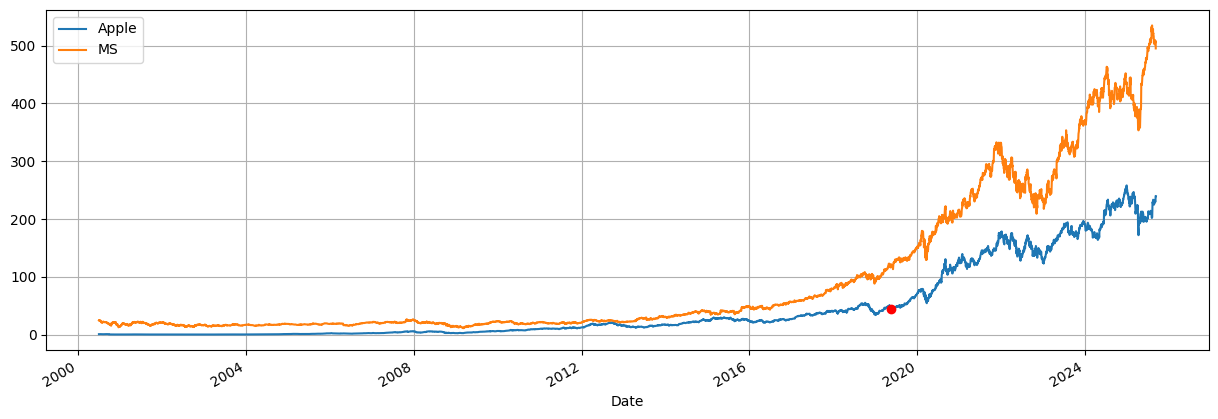

In [15]:
import matplotlib.pyplot as plt

# visualise a couple of time series and point out the value
series = [('AAPL','Close'), ('MSFT', 'Close')]
ax = data[series].plot(figsize=(15,5), grid=True)
ax.legend(['Apple', 'MS'])
show_value = data.loc[date, ('AAPL', 'Close')]
ax.plot([date], [show_value], marker='o', color='r')
# more on visualisetion with low-level control se https://matplotlib.org/users
# for making interactive plots se https://plotly.com/python/getting-started 
plt.show()

In [16]:

# Step 1: Filtering tickers that actually have 'High' and 'Low' data
available_tickers = [t for t in data.columns.levels[0] if 'High' in data[t].columns and 'Low' in data[t].columns]


In [17]:
# Step 2: Calculating daily High-Low differences (absolute)
daily_diff = pd.DataFrame(index=data.index)
for ticker in available_tickers:
    daily_diff[ticker] = data[ticker]['High'] - data[ticker]['Low']

In [18]:
# Step 3: Finding out the ticker per day with the maximum absolute difference
max_ticker = daily_diff.max().idxmax()
max_value = daily_diff[max_ticker].max()
max_date = daily_diff[max_ticker].idxmax()

In [19]:
# Step 4: Calculating percentage difference for that day
high_price = data[max_ticker]['High'].loc[max_date]
low_price = data[max_ticker]['Low'].loc[max_date]
pct_diff = (high_price - low_price) / low_price * 100

In [20]:

import matplotlib.pyplot as plt

# Step 5: Printing results
print("Largest single-day High–Low difference:")
print(f"Ticker           : {max_ticker}")
print(f"Date             : {max_date.date()}")
print(f"Absolute Diff    : {max_value:.2f}")
print(f"Percentage Diff  : {pct_diff:.2f}%")

Largest single-day High–Low difference:
Ticker           : FICO
Date             : 2025-07-08
Absolute Diff    : 374.91
Percentage Diff  : 24.67%


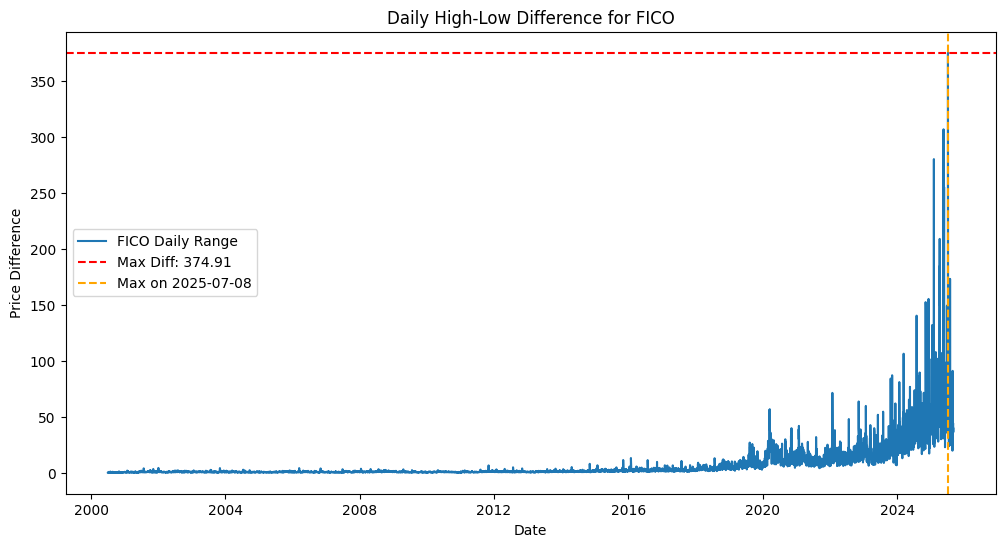

In [21]:
# Step 6: Visualizing daily High-Low for that ticker across all dates
plt.figure(figsize=(12,6))
plt.plot(data.index, data[max_ticker]['High'] - data[max_ticker]['Low'], label=f"{max_ticker} Daily Range")
plt.axhline(max_value, color="red", linestyle="--", label=f"Max Diff: {max_value:.2f}")
plt.axvline(max_date, color="orange", linestyle="--", label=f"Max on {max_date.date()}")
plt.title(f"Daily High-Low Difference for {max_ticker}")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.legend()
plt.show()


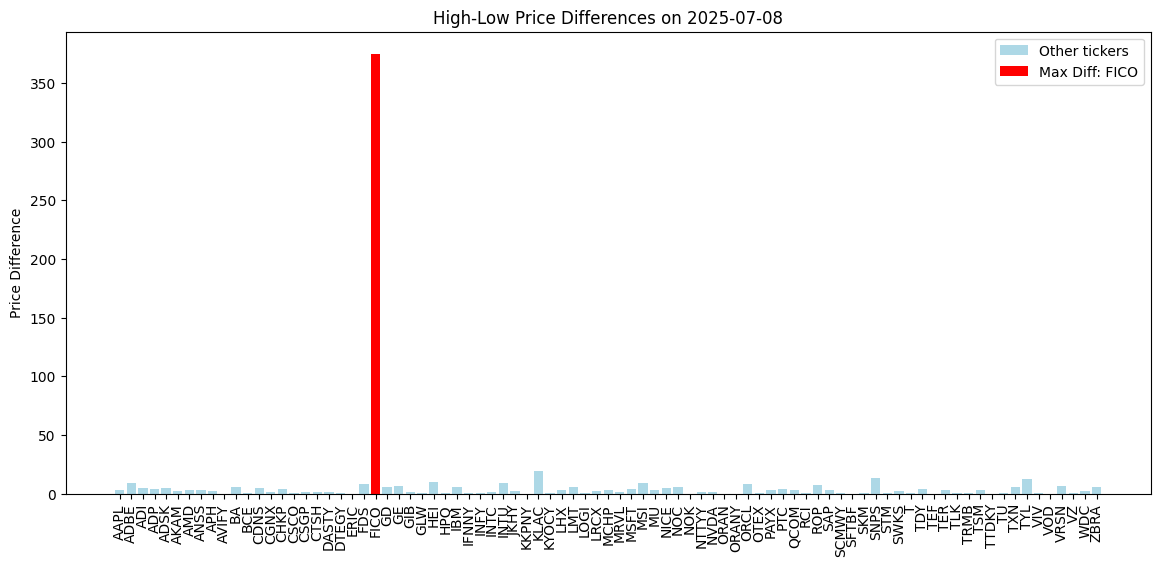

In [22]:
# Step 7: Ploting the daily differences of all tickers for the max_date
plt.figure(figsize=(14,6))

# Daily ranges for all tickers on that day
plt.bar(daily_diff.columns, daily_diff.loc[max_date], color='lightblue', label='Other tickers')

# Highlight the max ticker
plt.bar(max_ticker, max_value, color='red', label=f"Max Diff: {max_ticker}")

plt.title(f"High-Low Price Differences on {max_date.date()}")
plt.ylabel("Price Difference")
plt.xticks(rotation=90)
plt.legend()
plt.show()

#Solution:

Questions:Identify the stock that experienced the largest single-day High-Low price difference.

What is the name of the company?

On what date did this occur?

What was the percentage difference of this daily High-Low fluctuation

Answer: Largest single-day High–Low difference:

Comapany name (Ticker): Fair Isaac Corp (FICO)

Date             : 2025-07-08

Absolute Diff    : 374.91

Percentage Diff  : 24.67%

#Method

Approach:

I have used the following approach to manipulate the data and identify the stock with largest single-day High-Low price difference. Please find following comments in the attached jupyter notebook file.

Preparing data: Updated End date to get recent data

Cell 5:  END   = "2025-09-05" #updated the END to get the latest data

Cell 7: #loads the old data, downloading only the new data from Yahoo Finance and combining them with old data.

Cell 8: #it now shows updated latest data date

 

Analysing the dataset

Cell 16: # Step 1: Filtering tickers that actually have 'High' and 'Low' data

Cell 17: # Step 2: Calculating daily High-Low differences (absolute)

Cell 18: # Step 3: Finding out the ticker per day with the maximum absolute difference

Cell 19: # Step 4: Calculating percentage difference for that day

Cell 20: # Step 5: Printing results

Cell 21: # Step 6: Visualizing daily High-Low for that ticker across all dates

Cell 22: # Step 7: Ploting the daily differences of all tickers for the max_date